In [11]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# %load /home/dimitri/bin/jupyter_hide_code.txt
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


# Données

In [10]:
data_1 = pd.read_csv("2018/data_s01.csv", sep=";", decimal=".")
data_2 = pd.read_csv("2018/data_s02.csv", sep=";", decimal=".")
data = pd.concat([data_1, data_2])
print(data.shape, "\n\n", data.columns)

(400, 35) 

 Index(['session', 'joueur', 'hostname', 'understanding_faults', 'final_payoff',
       'id', 'partie_partie_id', 'PGG_period', 'PGG_treatment', 'PGG_group',
       'PGG_indiv', 'PGG_public', 'PGG_publicgroup', 'PGG_decisiontime',
       'PGG_indivpayoff', 'PGG_publicpayoff', 'PGG_periodpayoff',
       'PGG_cumulativepayoff', 'partie_id', 'naissance', 'genre',
       'nationalite', 'couple', 'etudiant', 'etudiant_discipline',
       'etudiant_niveau', 'experiences', 'fratrie_nombre', 'fratrie_rang',
       'sportif', 'sportif_type', 'sportif_competition', 'religion_place',
       'religion_croyance', 'religion_nom'],
      dtype='object')


## groupby

In [14]:
data_periods = data.groupby(data.PGG_period)
data_groups = data.groupby(data.PGG_group)
data_groups_periods = data.groupby([data.PGG_group, data.PGG_period])

In [15]:
groups = np.unique(data.PGG_group)

## Contribution moyenne

In [16]:
data_groups_averages = pd.DataFrame(data_groups.PGG_publicgroup.mean())
data_groups_averages

,PGG_publicgroup
PGG_group,
201802020927_g_0,28.5
201802020927_g_1,24.3
201802020927_g_2,21.2
201802020927_g_3,23.9
201802020927_g_4,51.4
201802021036_g_0,37.6
201802021036_g_1,13.5
201802021036_g_2,23.8
201802021036_g_3,13.8


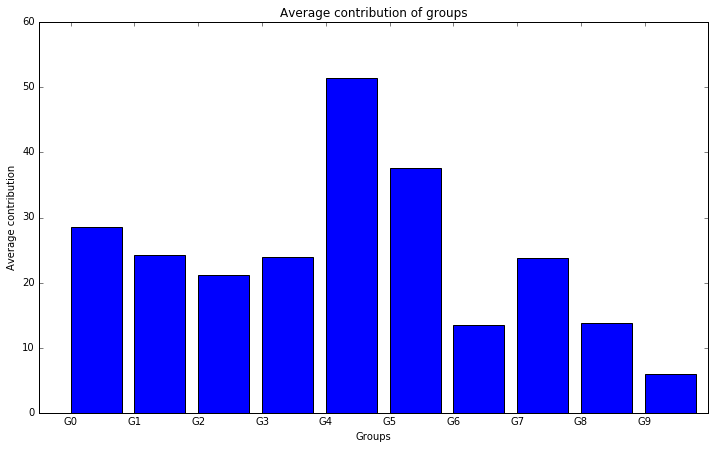

In [18]:
fig = plt.figure(figsize=(12, 7))

graph = fig.add_subplot(111)
graph.bar(range(1, len(groups)+1), data_groups_averages.PGG_publicgroup)
graph.set_xlim(0.5, len(groups)+1)
graph.set_xticks(range(1, len(groups)+1))
graph.set_xticklabels(["G{}".format(i) for i in range(len(groups))])
graph.set_xlabel("Groups")
graph.set_ylabel("Average contribution")
graph.set_title("Average contribution of groups");

## Evolution de la contribution moyenne

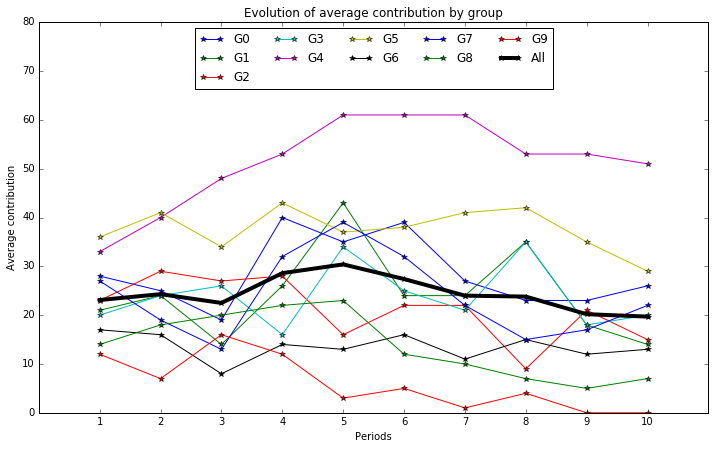

In [24]:
fig = plt.figure(figsize=(12, 7))

graph = fig.add_subplot(111)
for i, g in enumerate(np.unique(data.PGG_group)):
    graph.plot(range(1, 11), data_groups_periods.PGG_publicgroup.mean().loc[g], 
               label="G{}".format(i), marker="*")
graph.plot(range(1, 11), data_periods.PGG_publicgroup.mean(), "-*k", label="All", lw=4)

graph.set_xlim(0, 11)
graph.set_xticks(range(1, 11))
graph.set_xlabel("Periods")
graph.set_ylabel("Average contribution")
graph.set_ylim(0, 80)
graph.set_yticks(range(0, 81, 10))
graph.legend(loc="upper center", ncol=len(groups)//2)
graph.set_title("Evolution of average contribution by group");

## Fréquence de chaque contribution individuelle

In [25]:
data_frequencies = data.PGG_public.value_counts(normalize=True).reindex(range(0, 21))

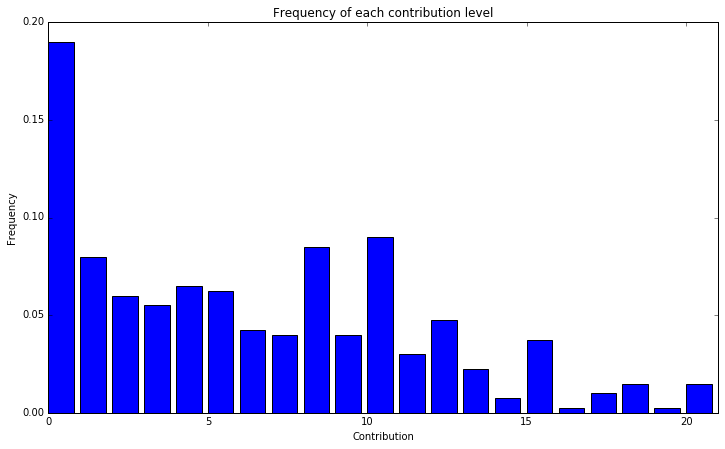

In [26]:
fig = plt.figure(figsize=(12, 7))
graph = fig.add_subplot(111)
graph.bar(range(21), data_frequencies)
graph.set_xlim(0, 21)
graph.set_xlabel("Contribution")
graph.set_ylabel("Frequency")
graph.set_title("Frequency of each contribution level");

### Par groupe

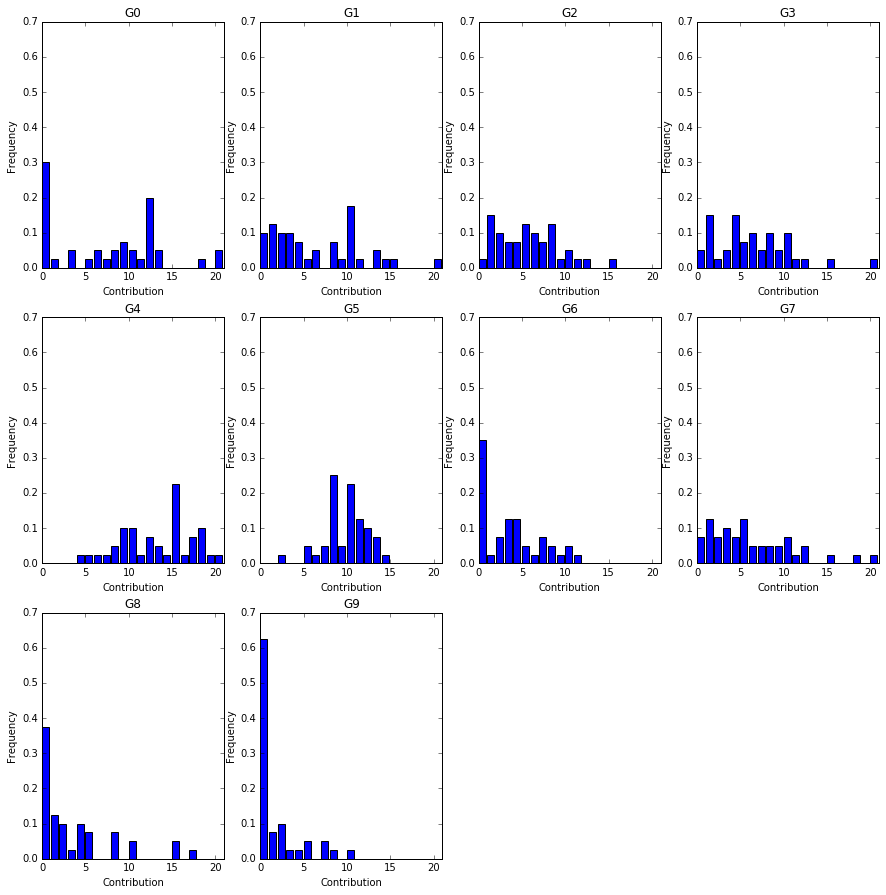

In [30]:
num_row = int(len(np.unique(data.PGG_group)) / 4) + int(len(np.unique(data.PGG_group))%4 > 0)
fig = plt.figure(figsize=(15, num_row * 5))

for i, g in enumerate(np.unique(data.PGG_group)):
    graph = fig.add_subplot(num_row, 4, i+1)
    tmp = data.loc[data.PGG_group == g, "PGG_public"]
    tmp2 = tmp.value_counts(normalize=True).reindex(range(21))
    graph.bar(range(21), tmp2)
    graph.set_xlim(0, 21)
    graph.set_xlabel("Contribution")
    graph.set_ylabel("Frequency")
    graph.set_ylim(0, 0.7)
    graph.set_title("G{}".format(i))